In [1]:
import pandas as pd

# First level

In [2]:
df_train = pd.read_pickle("./df_train_W_meta_metrics.pkl")
df_train

,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,19,11,1.727273,0.578947,0.064327,0,3,1.157895,1.0,0.0,...,1.871019,0.052632,0.157895,0.052632,0.052632,0.105263,0.397478,0.059110,dfs,dfs
1,34,130,0.261538,3.823529,0.231729,3,12,7.647059,7.0,6.0,...,3.051602,0.029412,0.117647,0.058824,0.058824,0.088235,0.324626,0.046827,best_first_search,best_first_search
2,68,364,0.186813,5.352941,0.159789,3,18,10.705882,11.0,9.0,...,3.374558,0.014706,0.058824,0.029412,0.029412,0.044118,0.301528,0.022069,best_first_search,best_first_search
3,58,122,0.475410,2.103448,0.073805,1,10,4.206897,4.0,3.0,...,2.907696,0.017241,0.051724,0.034483,0.017241,0.034483,0.319693,0.020953,best_first_search,astar
4,96,131,0.732824,1.364583,0.028728,0,9,2.729167,2.0,1.0,...,2.686679,0.010417,0.031250,0.020833,0.010417,0.020833,0.330712,0.011580,bidirectional_search,bidirectional_search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,25,2,12.500000,0.080000,0.006667,0,1,0.160000,0.0,0.0,...,0.634310,0.040000,0.080000,0.040000,0.040000,0.040000,0.248475,0.015238,randomized_shortest_path,randomized_shortest_path
4496,98,202,0.485149,2.061224,0.042499,0,12,4.122449,4.0,3.0,...,3.017961,0.010204,0.030612,0.020408,0.010204,0.020408,0.305481,0.011343,bidirectional_search,best_first_search
4497,51,71,0.718310,1.392157,0.055686,0,6,2.784314,3.0,2.0,...,2.478563,0.019608,0.039216,0.039216,0.019608,0.039216,0.313072,0.019226,dfs,best_first_search
4498,137,1547,0.088559,11.291971,0.166058,12,33,22.583942,23.0,19.0,...,4.022536,0.007299,0.036496,0.021898,0.014599,0.021898,0.261367,0.010864,best_first_search,astar


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         4500 non-null   int64  
 1   edges                                         4500 non-null   int64  
 2   ratio_n_m                                     4500 non-null   float64
 3   ratio_m_n                                     4500 non-null   float64
 4   density                                       4500 non-null   float64
 5   min_degree                                    4500 non-null   int64  
 6   max_degree                                    4500 non-null   int64  
 7   mean_degree                                   4500 non-null   float64
 8   median_degree                                 4500 non-null   float64
 9   q0.25_degree                                  4500 non-null   f

Encode labels

In [4]:
found_labels_in_df = df_train.iloc[:, 20].squeeze().unique().tolist()
print("Found labels:", found_labels_in_df)

encoder_labels = {'bidirectional_search': 1,
                  'best_first_search': 0,
                  'dfs': 1, 'dijkstra': 1,
                  'bfs': 1,
                  'randomized_shortest_path': 1,
                  'astar': 1}

df_train.replace({"target_time": encoder_labels}, inplace=True)

df_train.head()

Found labels: ['dfs', 'best_first_search', 'bidirectional_search', 'bfs', 'dijkstra', 'randomized_shortest_path', 'astar']


,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,19,11,1.727273,0.578947,0.064327,0,3,1.157895,1.0,0.0,...,1.871019,0.052632,0.157895,0.052632,0.052632,0.105263,0.397478,0.059110,1,dfs
1,34,130,0.261538,3.823529,0.231729,3,12,7.647059,7.0,6.0,...,3.051602,0.029412,0.117647,0.058824,0.058824,0.088235,0.324626,0.046827,0,best_first_search
2,68,364,0.186813,5.352941,0.159789,3,18,10.705882,11.0,9.0,...,3.374558,0.014706,0.058824,0.029412,0.029412,0.044118,0.301528,0.022069,0,best_first_search
3,58,122,0.475410,2.103448,0.073805,1,10,4.206897,4.0,3.0,...,2.907696,0.017241,0.051724,0.034483,0.017241,0.034483,0.319693,0.020953,0,astar
4,96,131,0.732824,1.364583,0.028728,0,9,2.729167,2.0,1.0,...,2.686679,0.010417,0.031250,0.020833,0.010417,0.020833,0.330712,0.011580,1,bidirectional_search


In [5]:
print(len(df_train))
df_train.dropna(inplace=True)
print(len(df_train))

4500
4500


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knnclass=KNeighborsClassifier(n_neighbors=5, algorithm="auto", weights="uniform", n_jobs=4)
knnclass.fit(df_train.iloc[:,:20].to_numpy(), df_train.iloc[:,20].to_numpy())

KNeighborsClassifier(n_jobs=4)

## Test

In [7]:
test_df = pd.read_pickle("./df_test_W_meta_metrics.pkl")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         500 non-null    int64  
 1   edges                                         500 non-null    int64  
 2   ratio_n_m                                     500 non-null    float64
 3   ratio_m_n                                     500 non-null    float64
 4   density                                       500 non-null    float64
 5   min_degree                                    500 non-null    int64  
 6   max_degree                                    500 non-null    int64  
 7   mean_degree                                   500 non-null    float64
 8   median_degree                                 500 non-null    float64
 9   q0.25_degree                                  500 non-null    flo

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         500 non-null    int64  
 1   edges                                         500 non-null    int64  
 2   ratio_n_m                                     500 non-null    float64
 3   ratio_m_n                                     500 non-null    float64
 4   density                                       500 non-null    float64
 5   min_degree                                    500 non-null    int64  
 6   max_degree                                    500 non-null    int64  
 7   mean_degree                                   500 non-null    float64
 8   median_degree                                 500 non-null    float64
 9   q0.25_degree                                  500 non-null    flo

In [9]:
test_df.replace({"target_time":encoder_labels}, inplace=True)
test_df.head()

,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,41,85,0.482353,2.073171,0.103659,1,10,4.146341,4.0,3.0,...,2.737474,0.024390,0.073171,0.048780,0.024390,0.048780,0.329137,0.031053,0,best_first_search
1,31,52,0.596154,1.677419,0.111828,1,6,3.354839,3.0,2.0,...,2.543065,0.032258,0.096774,0.064516,0.032258,0.064516,0.350882,0.042649,0,best_first_search
2,30,83,0.361446,2.766667,0.190805,2,10,5.533333,5.5,4.0,...,2.806239,0.033333,0.100000,0.066667,0.066667,0.066667,0.322118,0.045542,1,best_first_search
3,187,3046,0.061392,16.288770,0.175148,21,46,32.577540,33.0,29.5,...,4.143077,0.005348,0.026738,0.016043,0.010695,0.016043,0.246461,0.008123,0,randomized_shortest_path
4,105,141,0.744681,1.342857,0.025824,0,9,2.685714,2.0,1.0,...,2.702194,0.009524,0.028571,0.019048,0.009524,0.019048,0.330766,0.010532,1,bidirectional_search


In [10]:
print(len(test_df))
test_df.dropna(inplace=True)
print(len(test_df))

500
500


In [11]:
y_tilde = knnclass.predict(test_df.iloc[:,:20].to_numpy())

In [12]:
y = test_df.iloc[:,20]
y

0      0
1      0
2      1
3      0
4      1
      ..
495    1
496    0
497    1
498    0
499    0
Name: target_time, Length: 500, dtype: int64

In [13]:
acc=sum([1 for x,y in zip(y_tilde, y) if x==y])/len(y)
print(f"Accuracy: {acc*100}%")

Accuracy: 85.0%


F1-score: 0.8495315958970049


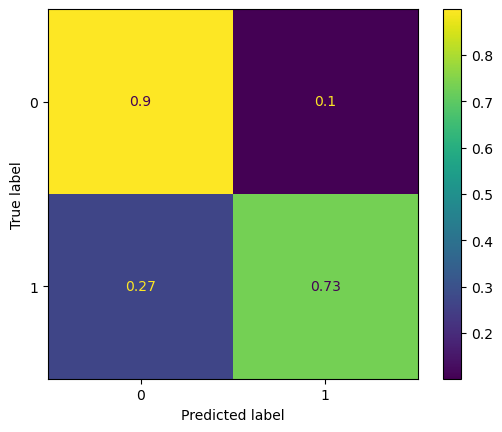

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

c_mat=confusion_matrix(y,y_tilde, normalize="true")
disp=ConfusionMatrixDisplay(c_mat)
disp.plot()

print("F1-score:", f1_score(y, y_tilde, average="weighted"))

In [15]:
import pickle
from datetime import datetime as dt
ts = dt.now().strftime("%Y-%m-%d-%H-%M")
print(ts)
with open(f"./models/{ts}_{int(acc*100)}accuracy_knn_first_level.pkl", mode="wb") as f:
    pickle.dump(knnclass, f)

2023-12-19-18-56


---
# Second level

In [16]:
df_train = pd.read_pickle("./df_train_W_meta_metrics.pkl")
df_train

,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,19,11,1.727273,0.578947,0.064327,0,3,1.157895,1.0,0.0,...,1.871019,0.052632,0.157895,0.052632,0.052632,0.105263,0.397478,0.059110,dfs,dfs
1,34,130,0.261538,3.823529,0.231729,3,12,7.647059,7.0,6.0,...,3.051602,0.029412,0.117647,0.058824,0.058824,0.088235,0.324626,0.046827,best_first_search,best_first_search
2,68,364,0.186813,5.352941,0.159789,3,18,10.705882,11.0,9.0,...,3.374558,0.014706,0.058824,0.029412,0.029412,0.044118,0.301528,0.022069,best_first_search,best_first_search
3,58,122,0.475410,2.103448,0.073805,1,10,4.206897,4.0,3.0,...,2.907696,0.017241,0.051724,0.034483,0.017241,0.034483,0.319693,0.020953,best_first_search,astar
4,96,131,0.732824,1.364583,0.028728,0,9,2.729167,2.0,1.0,...,2.686679,0.010417,0.031250,0.020833,0.010417,0.020833,0.330712,0.011580,bidirectional_search,bidirectional_search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,25,2,12.500000,0.080000,0.006667,0,1,0.160000,0.0,0.0,...,0.634310,0.040000,0.080000,0.040000,0.040000,0.040000,0.248475,0.015238,randomized_shortest_path,randomized_shortest_path
4496,98,202,0.485149,2.061224,0.042499,0,12,4.122449,4.0,3.0,...,3.017961,0.010204,0.030612,0.020408,0.010204,0.020408,0.305481,0.011343,bidirectional_search,best_first_search
4497,51,71,0.718310,1.392157,0.055686,0,6,2.784314,3.0,2.0,...,2.478563,0.019608,0.039216,0.039216,0.019608,0.039216,0.313072,0.019226,dfs,best_first_search
4498,137,1547,0.088559,11.291971,0.166058,12,33,22.583942,23.0,19.0,...,4.022536,0.007299,0.036496,0.021898,0.014599,0.021898,0.261367,0.010864,best_first_search,astar


In [17]:
# drop all best_first_search
df_train = df_train[df_train["target_time"] != "best_first_search"]
len(df_train)

1441

In [18]:
found_labels_in_df = df_train.iloc[:, 20].squeeze().unique().tolist()
print("Found labels:", found_labels_in_df)

encoder_labels = {'bidirectional_search': 0,
                  'dfs': 1, 'dijkstra': 2,
                  'bfs': 3,
                  'randomized_shortest_path': 4,
                  'astar': 5}

df_train.replace({"target_time": encoder_labels}, inplace=True)

df_train.head()

Found labels: ['dfs', 'bidirectional_search', 'bfs', 'dijkstra', 'randomized_shortest_path', 'astar']


C:\Users\MAX\AppData\Local\Temp\ipykernel_23684\4193142512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.replace({"target_time": encoder_labels}, inplace=True)


,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
0,19,11,1.727273,0.578947,0.064327,0,3,1.157895,1.0,0.0,...,1.871019,0.052632,0.157895,0.052632,0.052632,0.105263,0.397478,0.059110,1,dfs
4,96,131,0.732824,1.364583,0.028728,0,9,2.729167,2.0,1.0,...,2.686679,0.010417,0.031250,0.020833,0.010417,0.020833,0.330712,0.011580,0,bidirectional_search
5,18,2,9.000000,0.111111,0.013072,0,1,0.222222,0.0,0.0,...,0.764205,0.055556,0.111111,0.055556,0.055556,0.055556,0.279812,0.026055,1,dfs
7,31,19,1.631579,0.612903,0.040860,0,4,1.225806,1.0,0.0,...,2.049237,0.032258,0.096774,0.032258,0.032258,0.064516,0.398253,0.037303,1,dfs
12,11,1,11.000000,0.090909,0.018182,0,1,0.181818,0.0,0.0,...,0.684038,0.090909,0.181818,0.090909,0.090909,0.090909,0.266469,0.037620,1,dfs


In [19]:
print(len(df_train))
df_train.dropna(inplace=True)
print(len(df_train))

1441
1441


C:\Users\MAX\AppData\Local\Temp\ipykernel_23684\2586814334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace=True)


In [20]:
knnclass=KNeighborsClassifier(n_neighbors=5, algorithm="auto", weights="uniform", n_jobs=4)
knnclass.fit(df_train.iloc[:,0:20].to_numpy(), df_train.iloc[:,20].to_numpy())

KNeighborsClassifier(n_jobs=4)

## Test

In [21]:
test_df = pd.read_pickle("./df_test_W_meta_metrics.pkl")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nodes                                         500 non-null    int64  
 1   edges                                         500 non-null    int64  
 2   ratio_n_m                                     500 non-null    float64
 3   ratio_m_n                                     500 non-null    float64
 4   density                                       500 non-null    float64
 5   min_degree                                    500 non-null    int64  
 6   max_degree                                    500 non-null    int64  
 7   mean_degree                                   500 non-null    float64
 8   median_degree                                 500 non-null    float64
 9   q0.25_degree                                  500 non-null    flo

In [22]:
# drop all best_first_search
test_df = test_df[test_df["target_time"] != "best_first_search"]
len(df_train)

1441

In [23]:
test_df.replace({"target_time":encoder_labels}, inplace=True)
test_df.head()

,nodes,edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,...,entropy_degree,normalized_min_clique_size,normalized_max_clique_size,normalized_median_clique_size,normalized_q0.25_clique_size,normalized_q0.75_clique_size,normalized_variation_coefficient_clique_size,normalized_entropy_clique_size,target_time,target_space
2,30,83,0.361446,2.766667,0.190805,2,10,5.533333,5.5,4.00,...,2.806239,0.033333,0.100000,0.066667,0.066667,0.066667,0.322118,0.045542,0,best_first_search
4,105,141,0.744681,1.342857,0.025824,0,9,2.685714,2.0,1.00,...,2.702194,0.009524,0.028571,0.019048,0.009524,0.019048,0.330766,0.010532,0,bidirectional_search
10,158,272,0.580882,1.721519,0.021930,0,9,3.443038,3.0,2.00,...,2.768246,0.006329,0.018987,0.012658,0.006329,0.012658,0.302662,0.006427,0,bidirectional_search
14,31,81,0.382716,2.612903,0.174194,2,8,5.225806,5.0,3.50,...,2.671264,0.032258,0.096774,0.064516,0.064516,0.064516,0.320045,0.042368,0,best_first_search
15,24,29,0.827586,1.208333,0.105072,0,5,2.416667,2.5,1.75,...,2.182932,0.041667,0.125000,0.083333,0.041667,0.083333,0.352734,0.049284,0,best_first_search


In [24]:
print(len(test_df))
test_df.dropna(inplace=True)
print(len(test_df))

145
145


In [25]:
y_tilde = knnclass.predict(test_df.iloc[:,0:20].to_numpy())

In [26]:
y = test_df.iloc[:,20]

In [27]:
acc=sum([1 for x,y in zip(y_tilde, y) if x==y])/len(y)
print(f"Accuracy: {acc*100}%")

Accuracy: 57.24137931034483%


F1-score: 0.5503576766249872


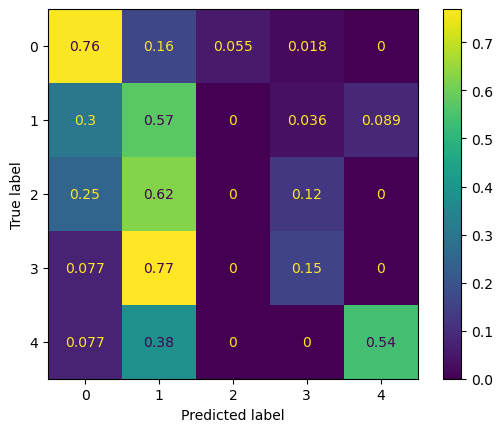

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

c_mat=confusion_matrix(y,y_tilde, normalize="true")
disp=ConfusionMatrixDisplay(c_mat)
disp.plot()

print("F1-score:", f1_score(y, y_tilde, average="weighted"))

In [31]:
import pickle
from datetime import datetime as dt

ts = dt.now().strftime("%Y-%m-%d-%H-%M")
print(ts)
with open(f"./models/{ts}_{int(acc*100)}accuracy_knn_second_level.pkl", mode="wb") as f:
    pickle.dump(knnclass, f)

2023-12-19-18-58
